In [2]:
#===Импорт необходимых библиотек
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
#===Загрузка данных и разделение на выборки
dataset_dir="../input/face-recognition-dataset/Original Images/Original Images/"
generator = ImageDataGenerator()
pics = generator.flow_from_directory(dataset_dir,target_size=(256, 256),batch_size=32)
classes = list(pics.class_indices.keys())
print(classes)

Found 2562 images belonging to 31 classes.
['Akshay Kumar', 'Alexandra Daddario', 'Alia Bhatt', 'Amitabh Bachchan', 'Andy Samberg', 'Anushka Sharma', 'Billie Eilish', 'Brad Pitt', 'Camila Cabello', 'Charlize Theron', 'Claire Holt', 'Courtney Cox', 'Dwayne Johnson', 'Elizabeth Olsen', 'Ellen Degeneres', 'Henry Cavill', 'Hrithik Roshan', 'Hugh Jackman', 'Jessica Alba', 'Kashyap', 'Lisa Kudrow', 'Margot Robbie', 'Marmik', 'Natalie Portman', 'Priyanka Chopra', 'Robert Downey Jr', 'Roger Federer', 'Tom Cruise', 'Vijay Deverakonda', 'Virat Kohli', 'Zac Efron']


In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [19]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 127, 127, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 64)       

In [20]:
history = model.fit(pics,epochs= 30, batch_size=32)

Epoch 1/30
 9/81 [==>...........................] - ETA: 3:04 - loss: 4.2403 - accuracy: 0.0566

/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 206 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 724 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 170 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/opt/conda/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:766: UserWarning: Possibly corrupt EXIF data.  Expecting to read 178 bytes but o

81/81 [==============================] - 201s 2s/step - loss: 3.6653 - accuracy: 0.0754
Epoch 2/30
81/81 [==============================] - 222s 3s/step - loss: 2.6627 - accuracy: 0.2228
Epoch 3/30
81/81 [==============================] - 206s 3s/step - loss: 2.1106 - accuracy: 0.3833
Epoch 4/30
81/81 [==============================] - 207s 3s/step - loss: 1.6570 - accuracy: 0.5061
Epoch 5/30
81/81 [==============================] - 236s 3s/step - loss: 1.1734 - accuracy: 0.6603
Epoch 6/30
81/81 [==============================] - 215s 3s/step - loss: 1.0612 - accuracy: 0.6761
Epoch 7/30
81/81 [==============================] - 220s 3s/step - loss: 0.6984 - accuracy: 0.8092
Epoch 8/30
81/81 [==============================] - 240s 3s/step - loss: 0.4817 - accuracy: 0.8772
Epoch 9/30
81/81 [==============================] - 212s 3s/step - loss: 0.3929 - accuracy: 0.8953
Epoch 10/30
81/81 [==============================] - 210s 3s/step - loss: 0.2667 - accuracy: 0.9349
Epoch 11/30
81/81 [=

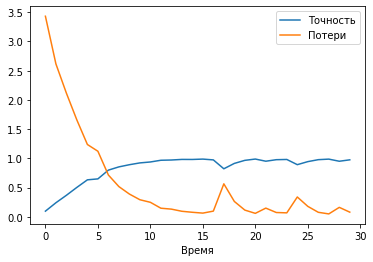

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Время')
plt.legend(['Точность', 'Потери'])
plt.show()

In [22]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(256,256,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Фактический класс: "+(image_path.split("/")[-1]).split("_")[0])
    print("Прогнозный класс: "+classes[np.argmax(pred)])

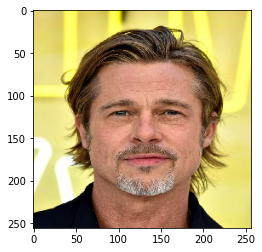

Фактический класс: Brad Pitt
Прогнозный класс: Brad Pitt


In [23]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Brad Pitt/Brad Pitt_16.jpg")

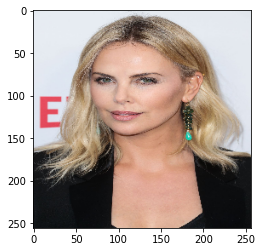

Фактический класс: Charlize Theron
Прогнозный класс: Charlize Theron


In [24]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Charlize Theron/Charlize Theron_77.jpg")

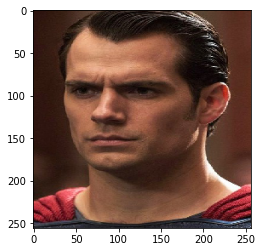

Фактический класс: Henry Cavill
Прогнозный класс: Henry Cavill


In [25]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Henry Cavill/Henry Cavill_15.jpg")

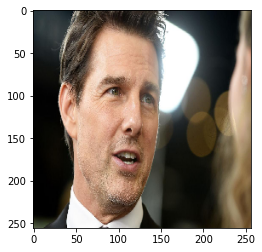

Фактический класс: Tom Cruise
Прогнозный класс: Tom Cruise


In [26]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Tom Cruise/Tom Cruise_57.jpg")

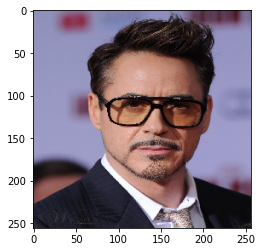

Фактический класс: Robert Downey Jr
Прогнозный класс: Robert Downey Jr


In [27]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Robert Downey Jr/Robert Downey Jr_112.jpg")

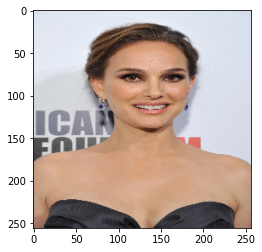

Фактический класс: Natalie Portman
Прогнозный класс: Natalie Portman


In [28]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Natalie Portman/Natalie Portman_104.jpg")

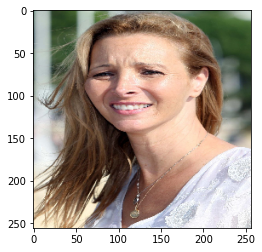

Фактический класс: Lisa Kudrow
Прогнозный класс: Lisa Kudrow


In [29]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Lisa Kudrow/Lisa Kudrow_69.jpg")

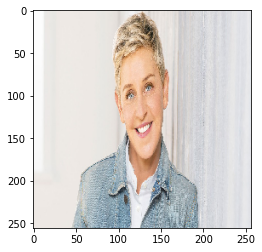

Фактический класс: Ellen Degeneres
Прогнозный класс: Ellen Degeneres


In [30]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Ellen Degeneres/Ellen Degeneres_74.jpg")

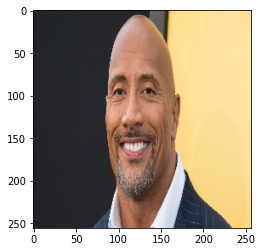

Фактический класс: Dwayne Johnson
Прогнозный класс: Dwayne Johnson


In [31]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Dwayne Johnson/Dwayne Johnson_60.jpg")

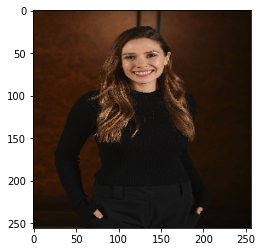

Фактический класс: Elizabeth Olsen
Прогнозный класс: Elizabeth Olsen


In [32]:
predict_image("../input/face-recognition-dataset/Original Images/Original Images/Elizabeth Olsen/Elizabeth Olsen_70.jpg")